# Adaptive Metropolis-Hastings example


### Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'library')))

from mcmc_utils import target_distribution
from mcmc_algorithms import adaptive_metropolis_hastings

### Run the model

In [2]:
# Define a custom target distribution using a mathematical expression
expression = '0.3 * exp(-0.5 * x**2) / sqrt(2 * pi) + 0.7 * exp(-0.5 * (x - 9)**2) / sqrt(2 * pi)'

# Create the target distribution function with a custom expression
target_dist_custom = target_distribution(expression)

# Use the target_dist_custom function in your MCMC sampler
initial_value = 0.0
num_iterations = 250000

samples, elapsed_time, overall_acceptance_rate, acceptance_rates = adaptive_metropolis_hastings(
        target_dist_custom, initial_value, num_iterations
    )

Sampling: 100%|██████████| 250000/250000 [02:18<00:00, 1804.09iteration/s, acceptance_rate=0.000316]


### Summary

In [3]:
# Print time taken and overall acceptance rate
print(f"Time taken: {elapsed_time:.2f} seconds")
print(f"Overall acceptance rate: {overall_acceptance_rate:.2f}")

Time taken: 138.58 seconds
Overall acceptance rate: 0.41


### Plots

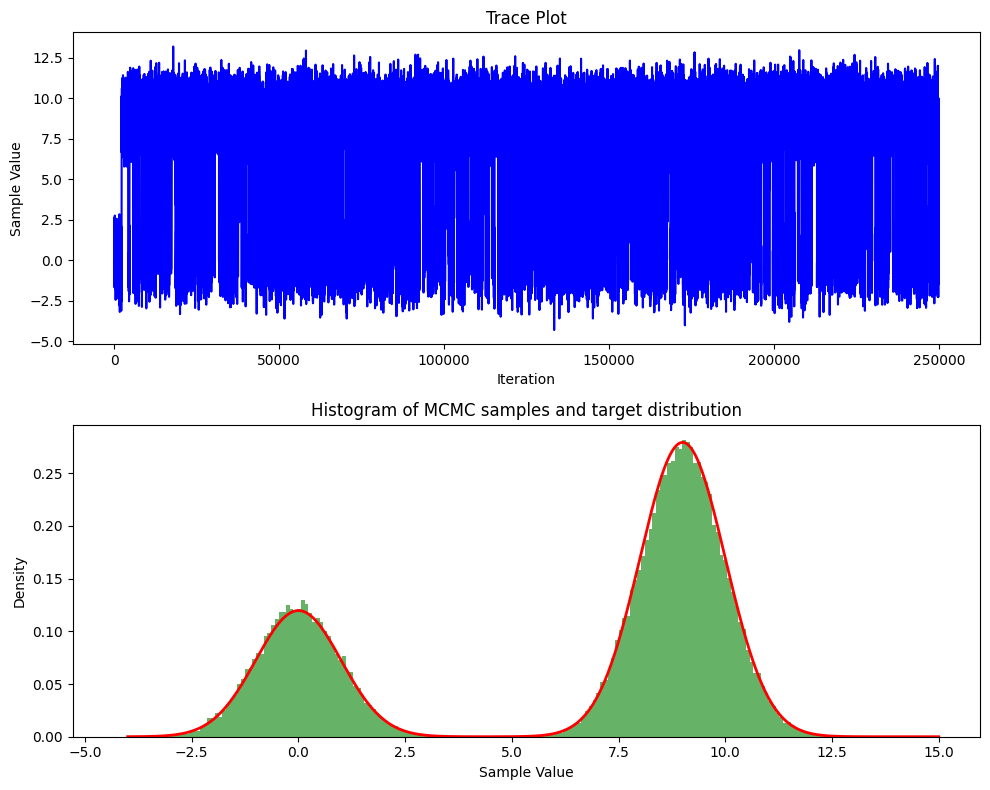

In [4]:
# Plot trace plot and histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot trace plot
ax1.plot(samples, color='blue')
ax1.set_title('Trace Plot')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Sample Value')

# Plot histogram of samples and target distribution
ax2.hist(samples, bins=200, density=True, alpha=0.6, color='g')
x = np.linspace(-4, 15, 1000)
ax2.plot(x, target_dist_custom(x), 'r', lw=2)
ax2.set_title('Histogram of MCMC samples and target distribution')
ax2.set_xlabel('Sample Value')
ax2.set_ylabel('Density')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Run the model multiple times and track time

In [5]:
# Parameters
initial_value = 0.0
iterations_list = [10000, 20000, 50000, 100000, 200000, 250000]
times_taken = []

# Run MCMC sampler for different numbers of iterations
for num_iterations in iterations_list:
    start_time = time.time()
    samples, elapsed_time, overall_acceptance_rate, acceptance_rates = adaptive_metropolis_hastings(
            target_dist_custom, initial_value, num_iterations
        )
    end_time = time.time()
    times_taken.append(elapsed_time)
    print(f"Iterations: {num_iterations}, Time taken: {elapsed_time:.2f} seconds, Overall acceptance rate: {overall_acceptance_rate:.2f}")

Sampling: 100%|██████████| 10000/10000 [00:05<00:00, 1931.02iteration/s, acceptance_rate=0.0094] 


Iterations: 10000, Time taken: 5.18 seconds, Overall acceptance rate: 0.50


Sampling: 100%|██████████| 20000/20000 [00:10<00:00, 1844.40iteration/s, acceptance_rate=0.00485] 


Iterations: 20000, Time taken: 10.85 seconds, Overall acceptance rate: 0.47


Sampling: 100%|██████████| 50000/50000 [00:27<00:00, 1799.13iteration/s, acceptance_rate=0.00182] 


Iterations: 50000, Time taken: 27.79 seconds, Overall acceptance rate: 0.43


Sampling: 100%|██████████| 100000/100000 [00:53<00:00, 1872.26iteration/s, acceptance_rate=0.00081]


Iterations: 100000, Time taken: 53.41 seconds, Overall acceptance rate: 0.42


Sampling: 100%|██████████| 200000/200000 [01:45<00:00, 1892.99iteration/s, acceptance_rate=0.000425]


Iterations: 200000, Time taken: 105.65 seconds, Overall acceptance rate: 0.41


Sampling: 100%|██████████| 250000/250000 [02:08<00:00, 1952.77iteration/s, acceptance_rate=0.000288]

Iterations: 250000, Time taken: 128.03 seconds, Overall acceptance rate: 0.40


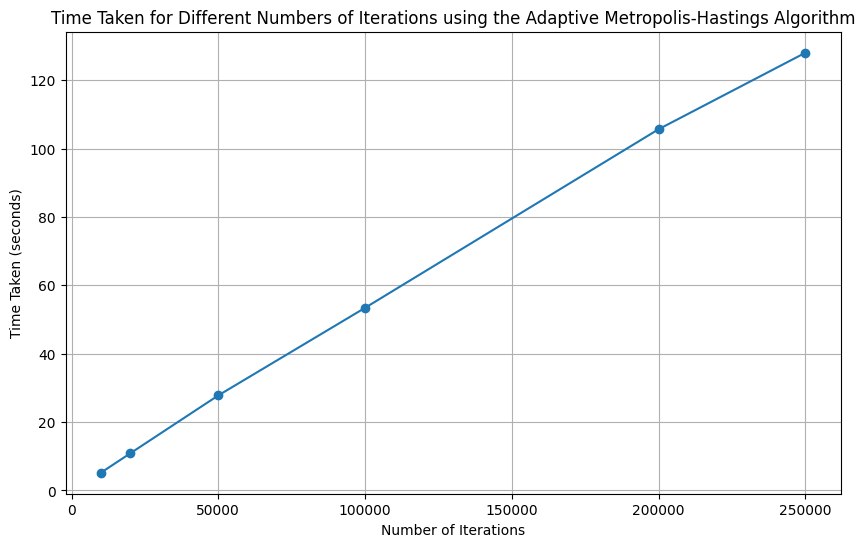

In [6]:
# Plot time taken for different numbers of iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations_list, times_taken, marker='o')
plt.title('Time Taken for Different Numbers of Iterations using the Adaptive Metropolis-Hastings Algorithm')
plt.xlabel('Number of Iterations')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.show()